# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student name: Alessandro Valente
    
ID: 1234429

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1234429
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 49 37 58 55 43 53 49 44 57]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


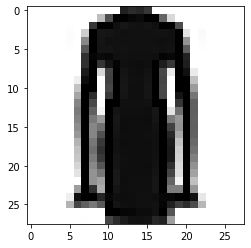

LABEL: 3
INPUT:


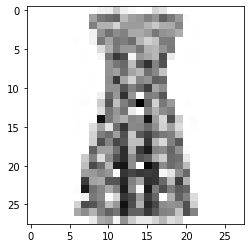

LABEL: 3
INPUT:


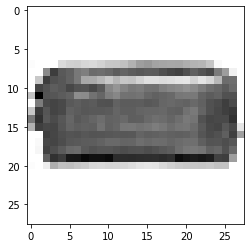

LABEL: 8
INPUT:


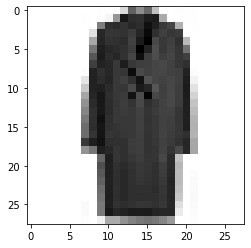

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

#run linear SVM
LinSVM = SVC(kernel='linear')
LinClasf = GridSearchCV(LinSVM, parameters, cv=4,return_train_score=True)
LinClasf.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')
print("Best parameters set found:")
print(LinClasf.best_params_)

print("Score with best parameters:")
print(LinClasf.best_score_)

print("All scores on the grid:")
LinResult = pd.DataFrame (LinClasf.cv_results_)
print(LinResult[['param_C', 'mean_test_score', 'mean_train_score']])


RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.05}
Score with best parameters:
0.778
All scores on the grid:
  param_C  mean_test_score  mean_train_score
0  0.0005            0.370          0.374005
1   0.005            0.706          0.765925
2    0.05            0.778          0.943274
3     0.5            0.778          1.000000
4       5            0.778          1.000000
5      50            0.778          1.000000
6     500            0.778          1.000000


/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

Pol2SVM = SVC(kernel='poly',degree=2)
Pol2Clasf = GridSearchCV(Pol2SVM, parameters, cv=4,return_train_score=True)
Pol2Clasf.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(Pol2Clasf.best_params_)

print("Score with best parameters:")
print(Pol2Clasf.best_score_)

print("\nAll scores on the grid:")
Pol2Result=pd.DataFrame(Pol2Clasf.cv_results_ )
print(Pol2Result[['param_C','param_gamma','mean_test_score','mean_train_score']])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.768

All scores on the grid:
  param_C param_gamma  mean_test_score  mean_train_score
0    0.05        0.05            0.720          0.873875
1    0.05         0.5            0.766          1.000000
2    0.05           5            0.766          1.000000
3     0.5        0.05            0.768          0.990654
4     0.5         0.5            0.766          1.000000
5     0.5           5            0.766          1.000000
6       5        0.05            0.766          1.000000
7       5         0.5            0.766          1.000000
8       5           5            0.766          1.000000


/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
Pol3SVM = SVC(kernel='poly',degree=3)
Pol3Clasf = GridSearchCV(Pol3SVM, parameters, cv=4,return_train_score=True)
Pol3Clasf.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(Pol3Clasf.best_params_)

print("Score with best parameters:")
print(Pol3Clasf.best_score_)

print("\nAll scores on the grid:")
Pol3Result=pd.DataFrame(Pol3Clasf.cv_results_ )
print(Pol3Result[['param_C','param_gamma','mean_test_score','mean_train_score']])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.74

All scores on the grid:
  param_C param_gamma  mean_test_score  mean_train_score
0    0.05        0.05            0.716          0.959977
1    0.05         0.5            0.730          1.000000
2    0.05           5            0.730          1.000000
3     0.5        0.05            0.740          0.991318
4     0.5         0.5            0.730          1.000000
5     0.5           5            0.730          1.000000
6       5        0.05            0.730          1.000000
7       5         0.5            0.730          1.000000
8       5           5            0.730          1.000000


/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
RbfSVM = SVC(kernel='rbf')
RbfClasf = GridSearchCV(RbfSVM, parameters, cv=4,return_train_score=True)
RbfClasf.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(RbfClasf.best_params_)

print("Score with best parameters:")
print(RbfClasf.best_score_)

print("\nAll scores on the grid:")
RbfResult=pd.DataFrame(RbfClasf.cv_results_ )
print(RbfResult[['param_C','param_gamma','mean_test_score','mean_train_score']])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 50, 'gamma': 0.005}
Score with best parameters:
0.79

All scores on the grid:
   param_C param_gamma  mean_test_score  mean_train_score
0      0.5       0.005            0.692          0.759944
1      0.5        0.05            0.652          0.920618
2      0.5         0.5            0.114          0.144666
3      0.5           5            0.142          0.144666
4        5       0.005            0.786          0.955981
5        5        0.05            0.762          1.000000
6        5         0.5            0.120          1.000000
7        5           5            0.114          1.000000
8       50       0.005            0.790          1.000000
9       50        0.05            0.762          1.000000
10      50         0.5            0.120          1.000000
11      50           5            0.114          1.000000
12     500       0.005            0.790          1.000000
13     500        0.05            0.762          1.000

/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO5
What do you observe when using RBF and polynomial kernels on this dataset ?

### ANSWER TO THE QUESTION

The first observation is that going at higher polynomial order  does decrease the score on the test set so for this reason i would expect the RBF kernel to be the best choice. This is confirmed by the tests since the RBF kernel has the highest score on the test set among all the ones.

An observation is that for the best parameters in the linear and RBF kernel the training error goes to 0 (score=1) but this is expected since the data set isn't very big and there are also numerical instability phenomena.

To confirm the fact that using higher order polynomial kernel does truly decrease the score on test set is possible to go even higher as in the cell below (only score values will be printed):

In [12]:
Pol4SVM = SVC(kernel='poly',degree=4)
Pol4Clasf = GridSearchCV(Pol4SVM, parameters, cv=4,return_train_score=True)
Pol4Clasf.fit(X_train,y_train)
Pol5SVM = SVC(kernel='poly',degree=5)
Pol5Clasf = GridSearchCV(Pol5SVM, parameters, cv=4,return_train_score=True)
Pol5Clasf.fit(X_train,y_train)
Pol6SVM = SVC(kernel='poly',degree=6)
Pol6Clasf = GridSearchCV(Pol6SVM, parameters, cv=4,return_train_score=True)
Pol6Clasf.fit(X_train,y_train)


print("Score with best parameters:")
print("Pol4: ", Pol4Clasf.best_score_)
print("Pol5: ", Pol5Clasf.best_score_)
print("Pol6: ", Pol6Clasf.best_score_)



/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Score with best parameters:
Pol4:  0.714
Pol5:  0.694
Pol6:  0.678


/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 6
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
#obs:: since the score in test and training set is equal for C=50 and C=500
#sometimes the part above return 500 as best estimation but 50 most of the times
#but the two values should lead to almost the same result since gamma variation has more influence
best_SVM = SVC(C=50,gamma=0.005,kernel='rbf')
best_SVM.fit(X_train,y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.222655


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [223 209 190 186 195 188 200 191 208 210]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

### TO DO 7

In [15]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=50,gamma=0.005,kernel='rbf')
best_SVM.fit(X_train,y_train)
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000500
Best SVM test error: 0.164224


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

### TO DO 8 Try first without regularization (use a very large large C)

In [16]:
from sklearn import linear_model
from sklearn import metrics

regression =   linear_model.LogisticRegression(C=10000)
regression.fit(X_train,y_train)

Y_pred_train=regression.predict(X_train)
Y_pred_test=regression.predict(X_test)

training_error= 1- metrics.accuracy_score(y_train, Y_pred_train)
test_error= 1- metrics.accuracy_score(y_test, Y_pred_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.238828


### TO DO 9 Then use also some regularization 

In [17]:
from sklearn import linear_model
from sklearn import metrics

L2regression =   linear_model.LogisticRegression(penalty='l2')
L2regression.fit(X_train,y_train)

Y_pred_train=L2regression.predict(X_train)
Y_pred_test=L2regression.predict(X_test)

training_error= 1- metrics.accuracy_score(y_train, Y_pred_train)
test_error= 1- metrics.accuracy_score(y_test, Y_pred_test)

print ("Best L2 regularized logistic regression training error: %f" % training_error)
print ("Best L2 regularized logistic regression test error: %f" % test_error)

L1regression =   linear_model.LogisticRegression(penalty='l1')
L1regression.fit(X_train,y_train)

Y_pred_train=L1regression.predict(X_train)
Y_pred_test=L1regression.predict(X_test)

training_error= 1- metrics.accuracy_score(y_train, Y_pred_train)
test_error= 1- metrics.accuracy_score(y_test, Y_pred_test)

print ("Best L1 regularized logistic regression training error: %f" % training_error)
print ("Best L1 regularized logistic regression test error: %f" % test_error)

/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best L2 regularized logistic regression training error: 0.037000
Best L2 regularized logistic regression test error: 0.183638


/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best L1 regularized logistic regression training error: 0.075000
Best L1 regularized logistic regression test error: 0.186862


## TO DO 10
Compare and discuss:
- the results from SVM with m=500 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression with and without regularization

### ANSWER TO THE QUESTION

As expected with a bigger training set the score on the test obtainet in the SVM set improves since the parameters get a better estimation.
We can also observe that in the bigger data set case the error on training set is not null as we would expect.

The logistic regression (with and without regularization) score on test set is worse than the score with SVM meaning that the SVM is the correct approach to this type of classification. We can also observe that without regualrization the logistic regression is able to decently classify the data even thou the score is worse compared to the SVM one; on the other hand the regularized regressions have better test error compared to the not regularized regression but the training error is higher and the test error is still bigger compared to the SVM one.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

predictions: 

Log reg : 3
SVM:  8
INPUT:


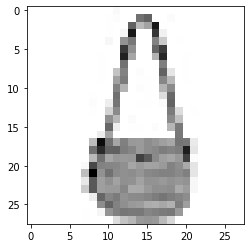

LABEL: 8


In [18]:
LR_prediction = L2regression.predict(X_test) #i use the l2 regression since has the highest score in the test set
SVM_prediction = best_SVM.predict(X_test)

for i in range(len(y_test)):
    if (SVM_prediction[i]!=LR_prediction[i] ) and (y_test[i]==SVM_prediction[i]):
        print("predictions: \n")
        print("Log reg :", LR_prediction[i])
        print("SVM: ",SVM_prediction[i])
        plot_input(X_test, y_test, i)
        break

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [19]:
# for better aligned printing of confusion matrix use floatmode='fixed' (not supported in all versions of Python)
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test,SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = sklearn.metrics.confusion_matrix(y_test,LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5777 5791 5810 5814 5805 5812 5800 5809 5792 5790]

 Confusion matrix SVM  
 
 [[4781   27  124  163   25    4  590    1   61    1]
 [  57 5540   63   97   19    0   11    0    3    1]
 [ 157    4 4258   39  727    1  587    0   36    1]
 [ 372   87  166 4721  278    0  170    0   20    0]
 [  19    4  627  180 4380    2  568    0   24    1]
 [   3    0    4    1    1 5305    4  300   29  165]
 [1029   14  632  121  514    1 3395    0   93    1]
 [   0    0    0    0    0  239    0 5342   11  217]
 [  60    6   59   43   35   41   90   32 5422    4]
 [   0    0    5    1    0  108    1  341    3 5331]]

 Confusion matrix SVM (normalized)   
 
 [[0.83 0.   0.02 0.03 0.   0.   0.1  0.   0.01 0.  ]
 [0.01 0.96 0.01 0.02 0.   0.   0.   0.   0.   0.  ]
 [0.03 0.   0.73 0.01 0.13 0.   0.1  0.   0.01 0.  ]
 [0.06 0.01 0.03 0.81 0.05 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.11 0.03 0.75 0.   0.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.91 0.   0.05 0. 

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

### ANSWER TO THE QUESTION


Both in the LR and SVM confusion matrix the worst classified class is the shirt class.

Some classes have better accuracies probably because in the recognition their class is easier to distinguish among the other.

This may be that also the explanation of the T-shirt bad classification result: since this class is similar to others  (tshirt pullover and dresses) is easier to be  missclassified, this fact may be confirmed observing that the classes that are not very similar to others like bag and trouser have high diagonal value in the matrices.